# DATA AUGMENTATION AND CLASSIFICATION

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import random
from random import choice
from string import ascii_uppercase
from time import sleep

### DATA AUGMENTATION

In [2]:
def brightness_increase(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [3]:
def brightness_decrease(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [4]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

In [5]:
def horizontal_flip(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img

In [6]:
def vertical_flip(img, flag):
    if flag:
        return cv2.flip(img, 0)
    else:
        return img

In [7]:
def sharpning(img):
    kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
    # applying the sharpening kernel to the input image & displaying it.
    image = cv2.filter2D(img, -1, kernel_sharpening)
    return image

In [8]:
augpath = "D:/DATASCIENCE/TshirtShirt/training/tshirts/"
path = "D:/DATASCIENCE/TshirtShirt/images/tshirtsbk/*.*"
for file in glob.glob(path):
    randomname  = ''.join(choice(ascii_uppercase) for i in range(10))
    
    #reading image
    img= cv2.imread(file)
    
    #Increasing brightness
    imgbi = brightness_increase(img,2.5)
    
    #writing image
    imgbiname = augpath+'TSHIRTBRIINC'+randomname+'.jpg'
    status = cv2.imwrite(imgbiname,imgbi)
    
    #Decreasing brightness
    imgbd = brightness_increase(img,0.5)
    
    #writing image
    imgbdname = augpath+'TSHIRTBRIDEC'+randomname+'.jpg'
    status = cv2.imwrite(imgbdname,imgbd)
    
    #Rotating image
    imgrotate = rotation(img, 30) 
    
    #writing image
    imgrotname = augpath+'TSHIRTROTATE'+randomname+'.jpg'
    status = cv2.imwrite(imgrotname,imgrotate)
    
    #Flipping image horizontally
    imgfliph = horizontal_flip(img, 30) 
    
    #writing image
    imgfliphname = augpath+'TSHIRTFLIPH'+randomname+'.jpg'
    status = cv2.imwrite(imgfliphname,imgfliph)
    
    #Flipping image vertically
    imgflipv = vertical_flip(img, 30) 
    
    #writing image
    imgflipvname = augpath+'TSHIRTFLIPV'+randomname+'.jpg'
    status = cv2.imwrite(imgflipvname,imgflipv)
    
    #Flipping image vertically
    imgsharp = sharpning(img) 
    
    #writing image
    imgsharpname = augpath+'TSHIRTSHARP'+randomname+'.jpg'
    status = cv2.imwrite(imgsharpname,imgsharp)

In [9]:
augpath = "D:/DATASCIENCE/TshirtShirt/training/shirts/"
path = "D:/DATASCIENCE/TshirtShirt/images/shirtsbk/*.*"
for file in glob.glob(path):
    randomname  = ''.join(choice(ascii_uppercase) for i in range(10))
    
    #reading image
    img= cv2.imread(file)
    
    #Increasing brightness
    imgbi = brightness_increase(img,2.5)
    
    #writing image
    imgbiname = augpath+'SHIRTBRIINC'+randomname+'.jpg'
    status = cv2.imwrite(imgbiname,imgbi)
    
    #Decreasing brightness
    imgbd = brightness_increase(img,0.5)
    
    #writing image
    imgbdname = augpath+'SHIRTBRIDEC'+randomname+'.jpg'
    status = cv2.imwrite(imgbdname,imgbd)
    
    #Rotating image
    imgrotate = rotation(img, 30) 
    
    #writing image
    imgrotname = augpath+'SHIRTROTATE'+randomname+'.jpg'
    status = cv2.imwrite(imgrotname,imgrotate)
    
    #Flipping image horizontally
    imgfliph = horizontal_flip(img, 30) 
    
    #writing image
    imgfliphname = augpath+'SHIRTFLIPH'+randomname+'.jpg'
    status = cv2.imwrite(imgfliphname,imgfliph)
    
    #Flipping image vertically
    imgflipv = vertical_flip(img, 30) 
    
    #writing image
    imgflipvname = augpath+'SHIRTFLIPV'+randomname+'.jpg'
    status = cv2.imwrite(imgflipvname,imgflipv)
    
    #Flipping image vertically
    imgsharp = sharpning(img) 
    
    #writing image
    imgsharpname = augpath+'SHIRTSHARP'+randomname+'.jpg'
    status = cv2.imwrite(imgsharpname,imgsharp)

### CLASSIFICATION

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [11]:
model = Sequential()

In [12]:
#Adding Convolution layer
img_width, img_height = 64,64
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [13]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

In [14]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

In [15]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [16]:
#Compiling the CNN
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [18]:
#Generating image data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen  = ImageDataGenerator(rescale=1./255)

In [19]:
#Fitting image to the CNN
#Defining data directory
train_data_dir = 'D:/DATASCIENCE/TshirtShirt/training'
validation_data_dir = 'D:/DATASCIENCE/TshirtShirt/validation'

nb_train_samples =1400
nb_validation_samples = 40
epochs = 50
batch_size = 30

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(64,64),
                                                batch_size = batch_size,
                                                class_mode = 'binary')


test_set = test_datagen.flow_from_directory(validation_data_dir,
                                           target_size=(64,64),
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 1397 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [20]:
#Training and Evaluating the model


history = model.fit( 
    training_set, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=test_set, 
    validation_steps=nb_validation_samples // batch_size) 

Epoch 1/50
46/46 [==============================] - 19s 424ms/step - loss: 0.6840 - accuracy: 0.5867 - val_loss: 0.6162 - val_accuracy: 0.7667
Epoch 2/50
46/46 [==============================] - 15s 324ms/step - loss: 0.6018 - accuracy: 0.6928 - val_loss: 0.6318 - val_accuracy: 0.6333
Epoch 3/50
46/46 [==============================] - 15s 322ms/step - loss: 0.5218 - accuracy: 0.7557 - val_loss: 0.5103 - val_accuracy: 0.8667
Epoch 4/50
46/46 [==============================] - 14s 314ms/step - loss: 0.4451 - accuracy: 0.7857 - val_loss: 0.4636 - val_accuracy: 0.8333
Epoch 5/50
46/46 [==============================] - 15s 331ms/step - loss: 0.4280 - accuracy: 0.8127 - val_loss: 0.3683 - val_accuracy: 0.9000
Epoch 6/50
46/46 [==============================] - 14s 304ms/step - loss: 0.3803 - accuracy: 0.8310 - val_loss: 0.3837 - val_accuracy: 0.8333
Epoch 7/50
46/46 [==============================] - 15s 329ms/step - loss: 0.4063 - accuracy: 0.8178 - val_loss: 0.4162 - val_accuracy: 0.7667

Text(0.5, 1.0, 'Loss Curves')

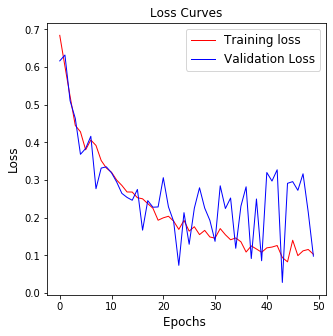

In [21]:
# Loss Curves
plt.figure(figsize=[5,5])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.title('Loss Curves',fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

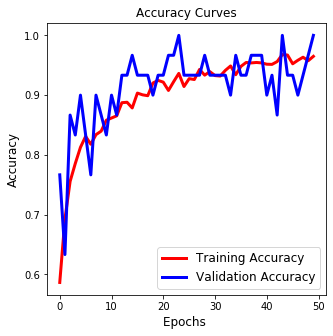

In [22]:
# Accuracy Curves
plt.figure(figsize=[5,5])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy Curves',fontsize=12)

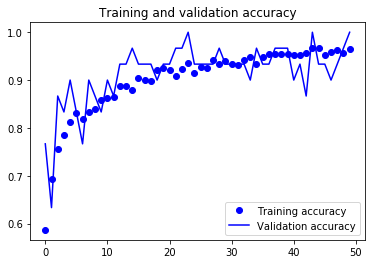

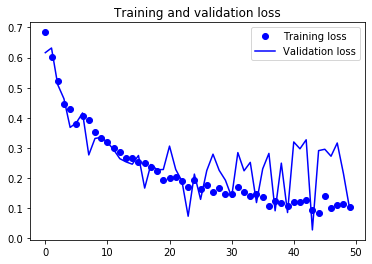

In [23]:

import matplotlib.pyplot as plt
%matplotlib inline

history4 = history
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
#Saving the model
model.save('tshirtandshirtaugmentatioincnn_model.h5')

In [25]:
#loading the model for testing
from keras.models import load_model 
classifier = load_model('tshirtandshirtaugmentatioincnn_model.h5')

In [26]:
from keras.preprocessing import image
import numpy as np

#Loading image from drive
test_image =image.load_img('D:/DATASCIENCE/TshirtShirt/manual_test/17.jpg',target_size =(64,64))

#Converting image to array
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axits =0)

#Predicting image
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'tshirt'
else:
    prediction = 'shirt'
print(prediction)

shirt


### CONCLUSION

In this assignment, I've tried to classify two category images. I downloaded images from Flipkart for two different categories by using a web scraping script. Then, saved all images in a directory with two labels as a t-shirt and shirt. After downloading, I've applied multiple augmentation techniques such as brightness, flip, rotation, and sharpening. Then imported the required libraries of Keras and created a model with two convolutional layers, a dense layer, and also added dropout to avoid overfitting/underfitting, then compiled the model with test and train data and got the accuracy score of 0.9. After testing multiple images manually I found that the model is predicting 8 out of 10 images correctly.